### Importing the Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the Dataset

In [2]:
# Load the provided CSV file to inspect the data
file_path = 'data_csv.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the data to understand its structure
data.head()

CASE_NO_PATIENT'S  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0                  1   0   0   0   0   0   0   1   1   0  ...   
1                  2   1   1   0   0   0   1   1   0   0  ...   
2                  3   1   0   0   0   0   0   1   1   0  ...   
3                  4   1   1   1   1   1   1   1   1   1  ...   
4                  5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

   Social/Behavioural Issues  Childhood Autism Rating Scale  Anxiety_disorder  \
0                        Yes                              1               Yes   
1                        Yes                              2               Yes   
2                        Yes                              4               Yes   
3                        Yes                              2               Yes   
4                        Yes                              1               Yes   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   F  middle eastern      Yes                  No          Family Member   
1   M  White European      Yes                  No          Family Member   
2   M  Middle Eastern      Yes                  No          Family Member   
3   M        Hispanic       No                  No          Family Member   
4   F  White European       No                  No          Family Member   

  ASD_traits  
0         No  
1        Yes  
2        Yes  
3        Yes  
4        Yes  

[5 rows x 28 columns]

In [3]:
# Drop the column 'CASE_NO_PATIENT'S'
data = data.drop(columns=["CASE_NO_PATIENT'S"])

### Non Graphical Analysis

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values

A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                                             1
Global developmental delay/inte

there are some missing rows. this will be addressed in the Preprocessing phase 

##### exploratory data analysis (EDA)

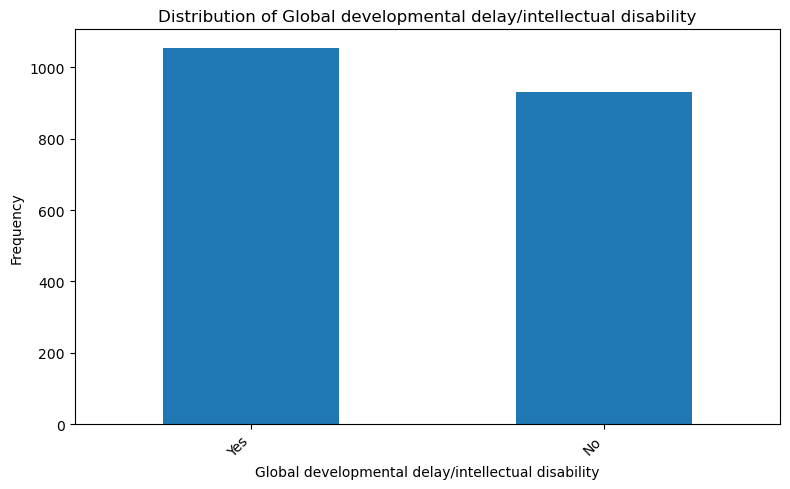

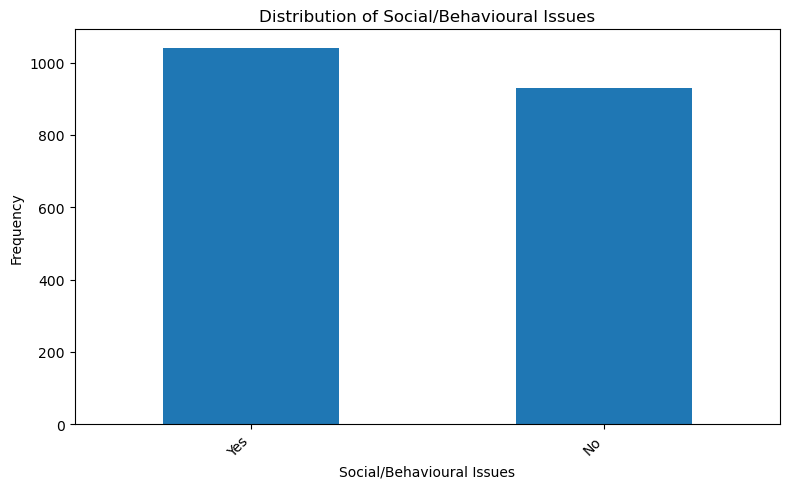

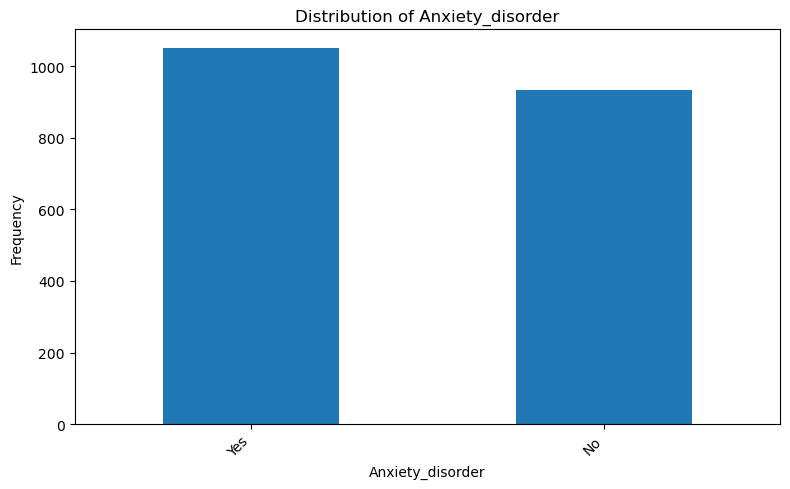

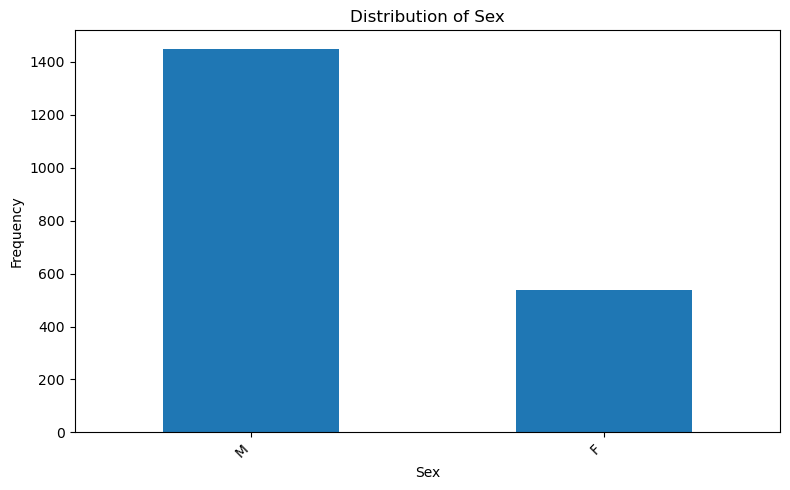

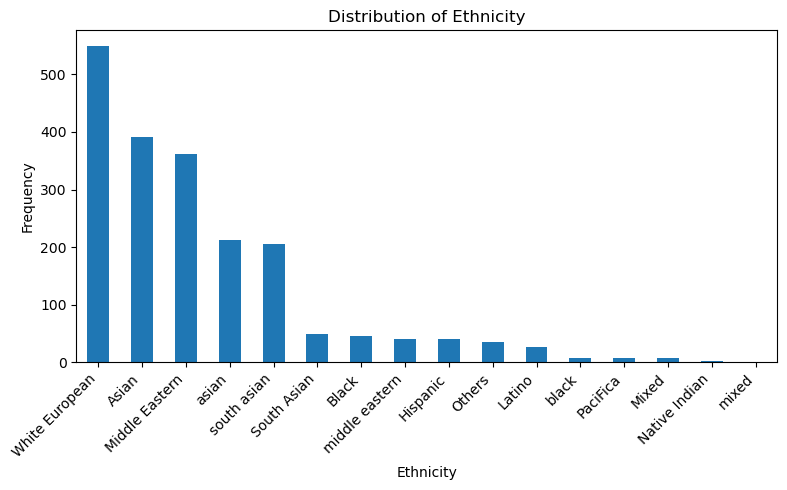

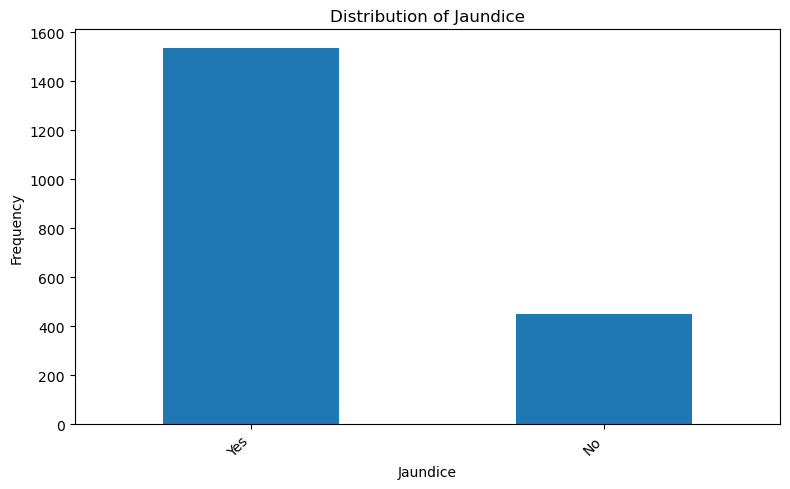

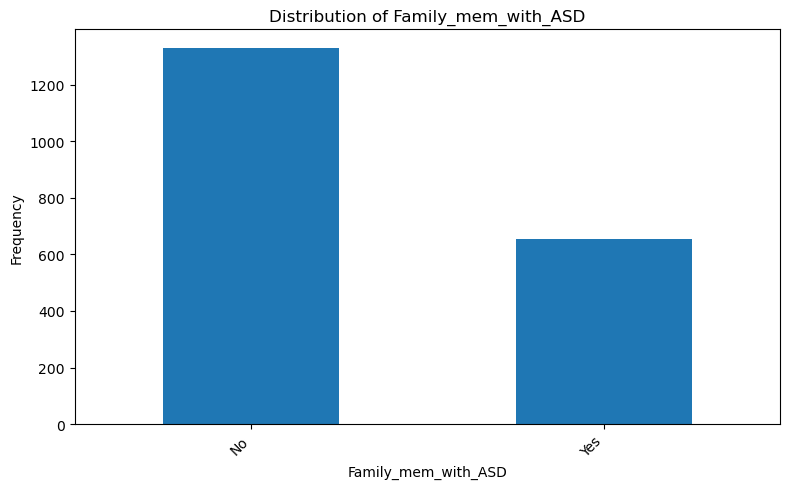

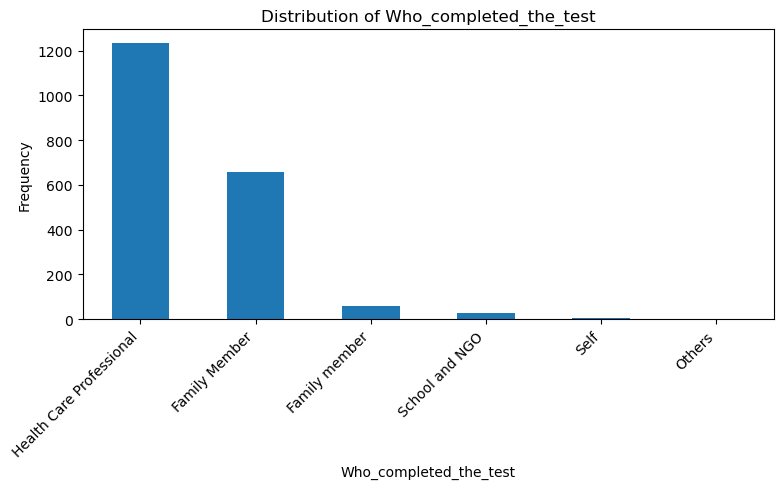

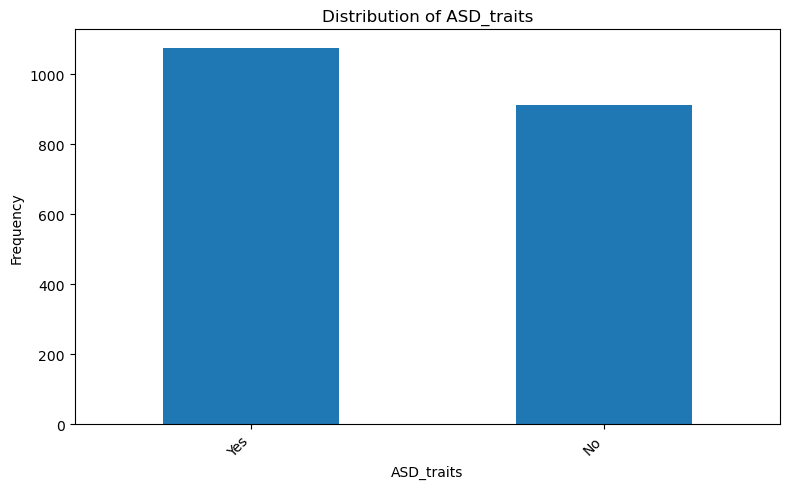

In [5]:
# List of categorical columns for visualization
categorical_columns = [
    'Global developmental delay/intellectual disability', 
    'Social/Behavioural Issues', 
    'Anxiety_disorder', 
    'Sex', 
    'Ethnicity', 
    'Jaundice', 
    'Family_mem_with_ASD', 
    'Who_completed_the_test', 
    'ASD_traits'
]

# Function to plot categorical variables
def plot_categorical_variables(data, columns):
    for column in columns:
        plt.figure(figsize=(8, 5))
        data[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot the categorical variables
plot_categorical_variables(data, categorical_columns)


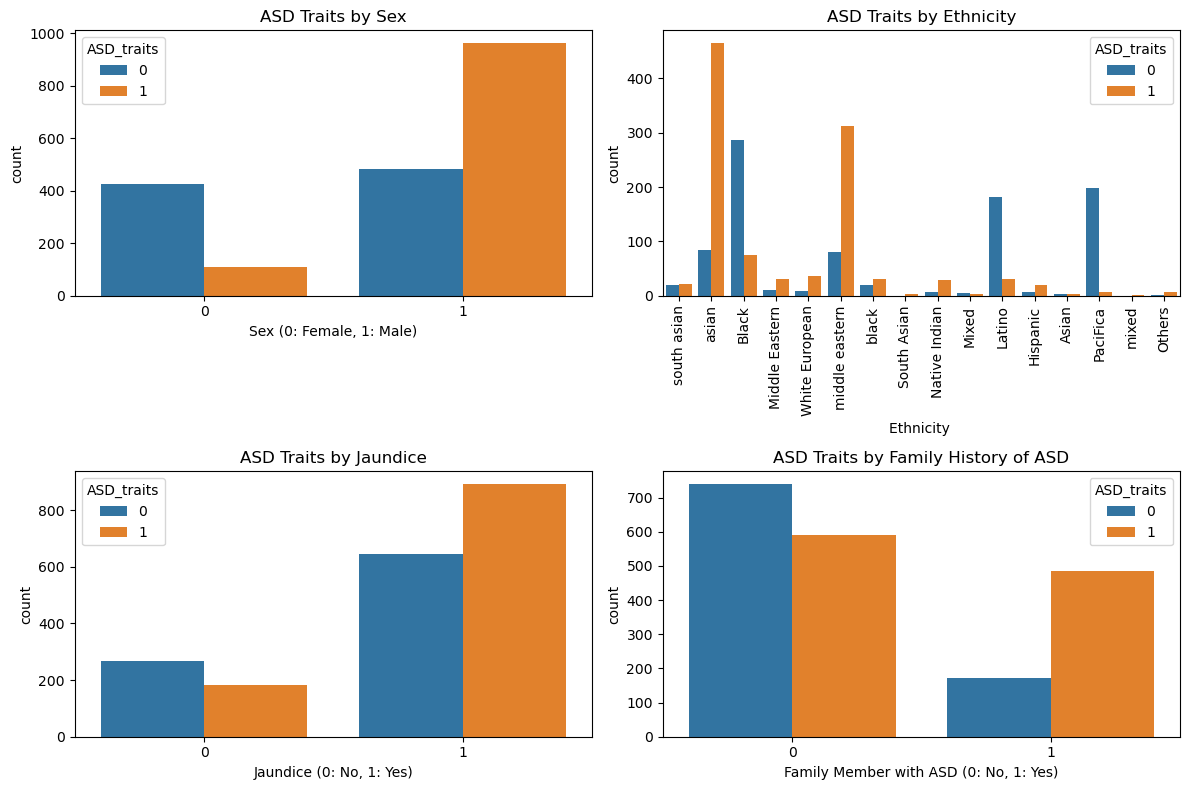

In [6]:
# Simple imputation: Fill missing values with the mode for categorical columns
data['Social_Responsiveness_Scale'].fillna(data['Social_Responsiveness_Scale'].mode()[0], inplace=True)
data['Qchat_10_Score'].fillna(data['Qchat_10_Score'].mode()[0], inplace=True)
data['Depression'].fillna(data['Depression'].mode()[0], inplace=True)
data['Social/Behavioural Issues'].fillna(data['Social/Behavioural Issues'].mode()[0], inplace=True)

# Save the original ethnicity names for visualization purposes
ethnicity_original = data['Ethnicity'].unique()

# Convert categorical variables into numeric for modeling
categorical_columns = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Depression', 
                       'Global developmental delay/intellectual disability', 
                       'Social/Behavioural Issues', 'Anxiety_disorder', 'ASD_traits']

# Perform label encoding
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Reassign the original Ethnicity names for visualization purposes
ethnicity_mapping = dict(enumerate(ethnicity_original))
data['Ethnicity'] = data['Ethnicity'].map(ethnicity_mapping)

# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Plot distribution of ASD traits by Sex
plt.subplot(2, 2, 1)
sns.countplot(x='Sex', hue='ASD_traits', data=data)
plt.title('ASD Traits by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')

# Plot distribution of ASD traits by Ethnicity
plt.subplot(2, 2, 2)
sns.countplot(x='Ethnicity', hue='ASD_traits', data=data)
plt.title('ASD Traits by Ethnicity')
plt.xticks(rotation=90)
plt.xlabel("Ethnicity ")

# Plot distribution of ASD traits by Jaundice
plt.subplot(2, 2, 3)
sns.countplot(x='Jaundice', hue='ASD_traits', data=data)
plt.title('ASD Traits by Jaundice')
plt.xlabel('Jaundice (0: No, 1: Yes)')

# Plot distribution of ASD traits by Family History of ASD
plt.subplot(2, 2, 4)
sns.countplot(x='Family_mem_with_ASD', hue='ASD_traits', data=data)
plt.title('ASD Traits by Family History of ASD')
plt.xlabel('Family Member with ASD (0: No, 1: Yes)')

# Display the plots
plt.tight_layout()
plt.show()

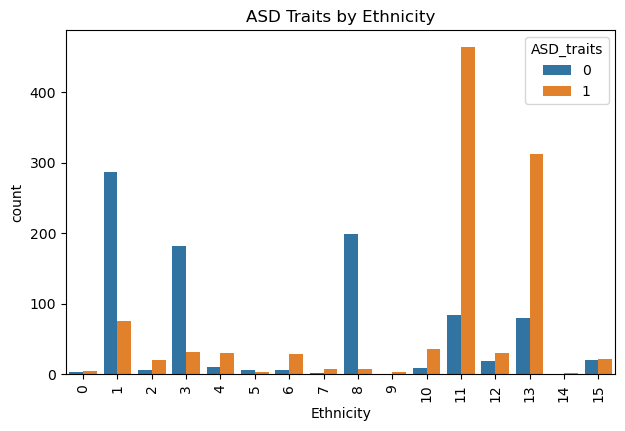

In [7]:
# convert Ethinicity back to numeric
data['Ethnicity'] = data['Ethnicity'].astype('category').cat.codes

# Set up the plotting environment
plt.figure(figsize=(12, 8))
# Plot distribution of ASD traits by Ethnicity
plt.subplot(2, 2, 2)
sns.countplot(x='Ethnicity', hue='ASD_traits', data=data)
plt.title('ASD Traits by Ethnicity')
plt.xticks(rotation=90)
plt.xlabel('Ethnicity')
# Display the plots
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3008\3978192102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


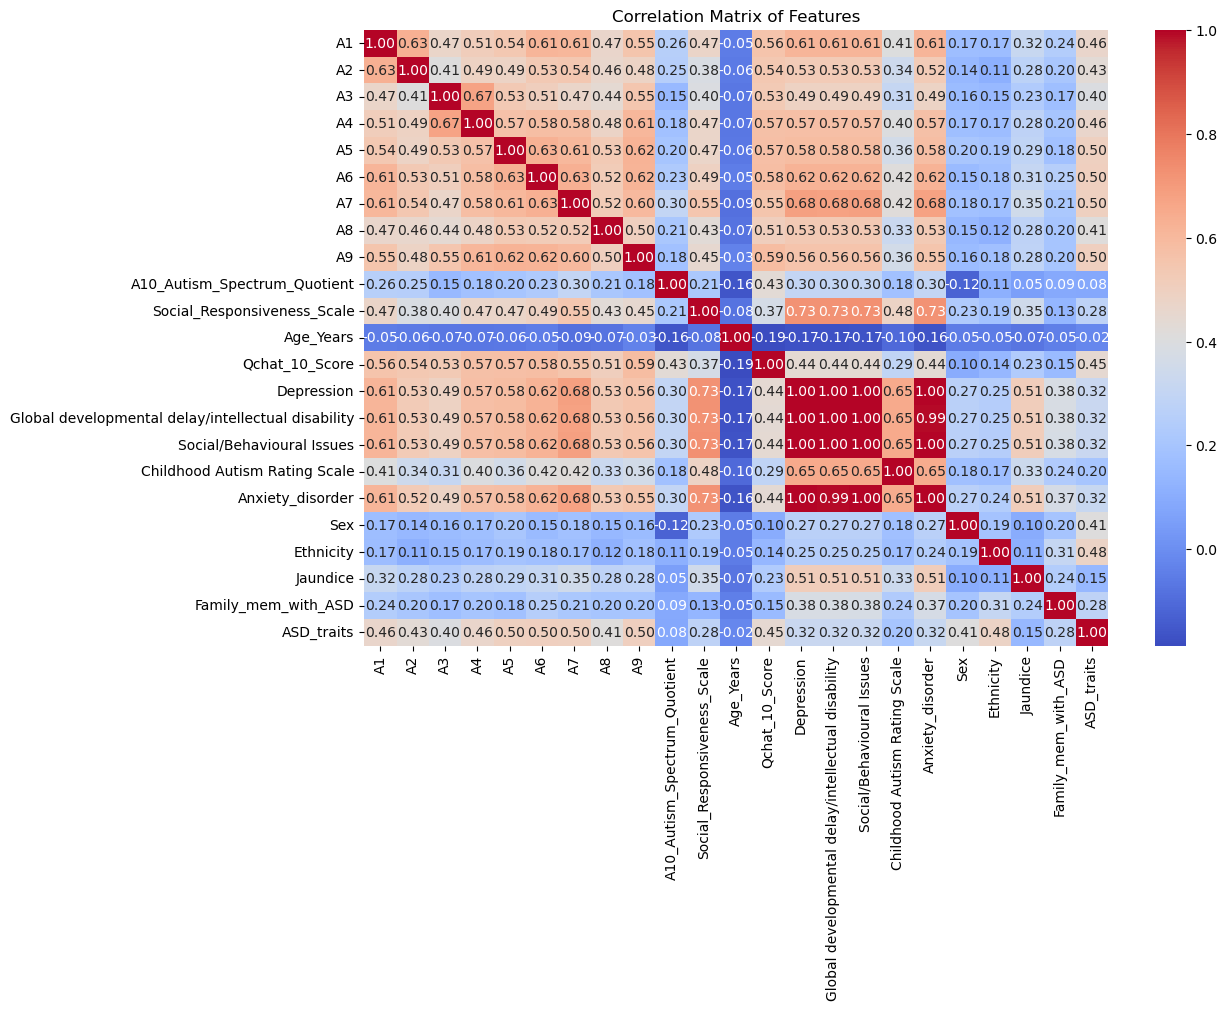

In [8]:
# Calculate the correlation matrix for numeric features
correlation_matrix = data.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

### Preprocessing

In [9]:
# Define features (X) and target (y)
X = data.drop(columns=['ASD_traits', 'Who_completed_the_test'])  # Dropping irrelevant columns
y = data['ASD_traits']

# Identify all object (string) columns that need encoding
object_columns = X.select_dtypes(include=['object']).columns

# Convert object columns to categorical and encode them
for col in object_columns:
    X[col] = X[col].astype('category').cat.codes

# # splitting the dataset after encoding
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# First, split the data into train (70%) and a temp set (30% for validation and test).
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Then, split the temp set into validation (15%) and test (15%).
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Check the sizes of the resulting splits
(X_train.shape, X_val.shape, X_test.shape)

((1389, 25), (298, 25), (298, 25))

In [11]:
# Feature scaling for models like Logistic Regression and SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Model training

In [12]:
# Models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(precision, recall, model_name):
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, lw=2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

Training Logistic Regression...
Logistic Regression Validation Accuracy: 0.9497
Logistic Regression Test Accuracy: 0.9732
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       137
           1       0.98      0.97      0.97       161

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298

Logistic Regression saved as C:/Users/HP/OneDrive/Desktop/Karatu/Autism_Spectrum_Disorder_Project/Autism_Project\Logistic_Regression_model.pkl


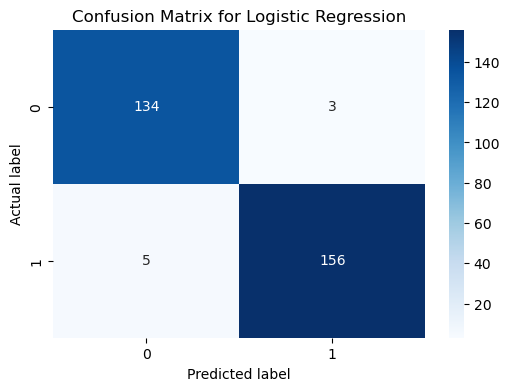

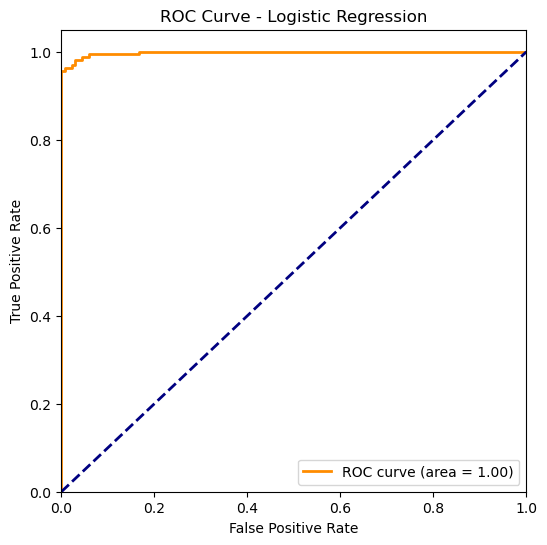

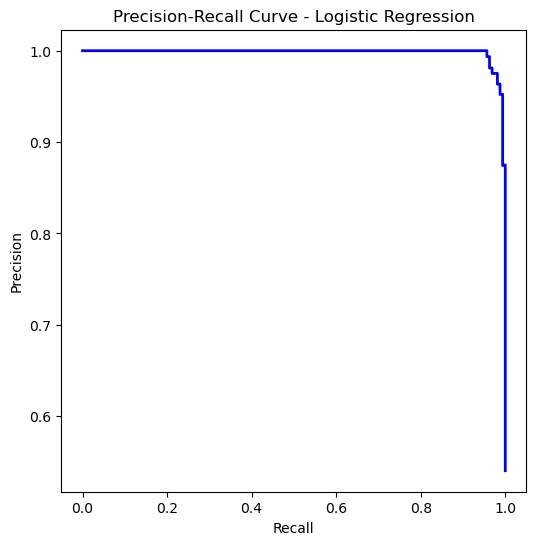

Training Random Forest...


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Validation Accuracy: 1.0000
Random Forest Test Accuracy: 1.0000
Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       161

    accuracy                           1.00       298
   macro avg       1.00      1.00      1.00       298
weighted avg       1.00      1.00      1.00       298

Random Forest saved as C:/Users/HP/OneDrive/Desktop/Karatu/Autism_Spectrum_Disorder_Project/Autism_Project\Random_Forest_model.pkl


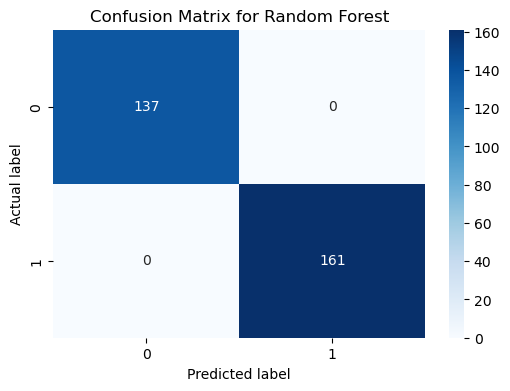

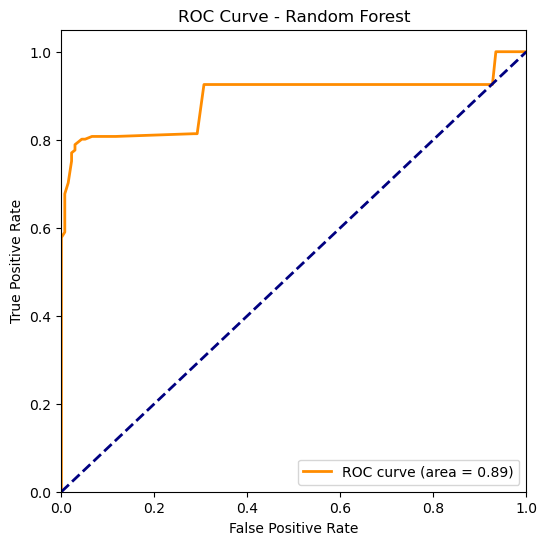

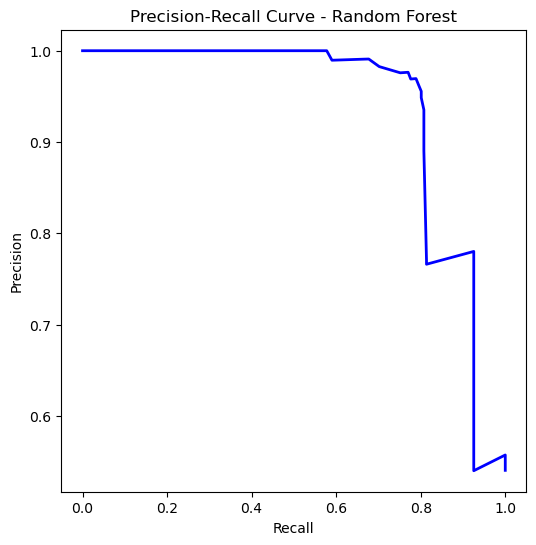

Training SVM...
SVM Validation Accuracy: 0.9933
SVM Test Accuracy: 0.9866
SVM Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       137
           1       0.98      0.99      0.99       161

    accuracy                           0.99       298
   macro avg       0.99      0.99      0.99       298
weighted avg       0.99      0.99      0.99       298

SVM saved as C:/Users/HP/OneDrive/Desktop/Karatu/Autism_Spectrum_Disorder_Project/Autism_Project\SVM_model.pkl


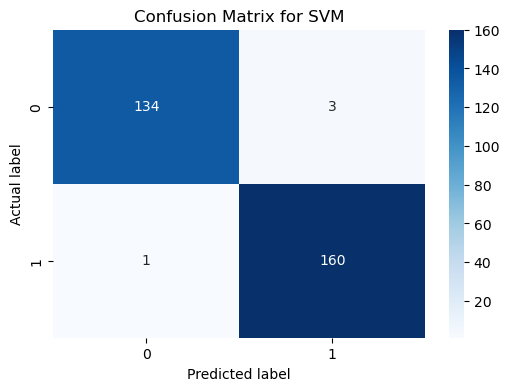

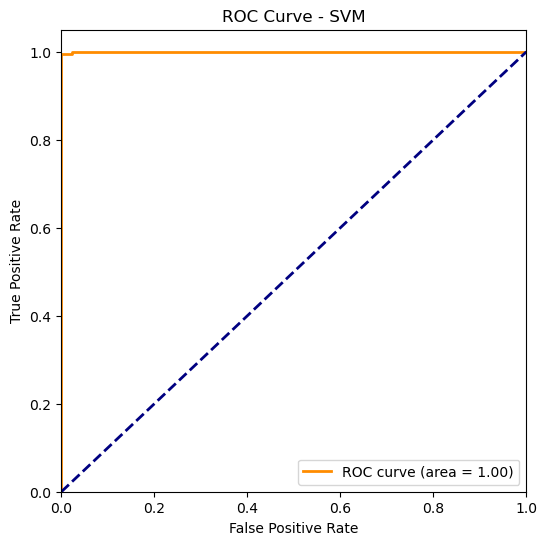

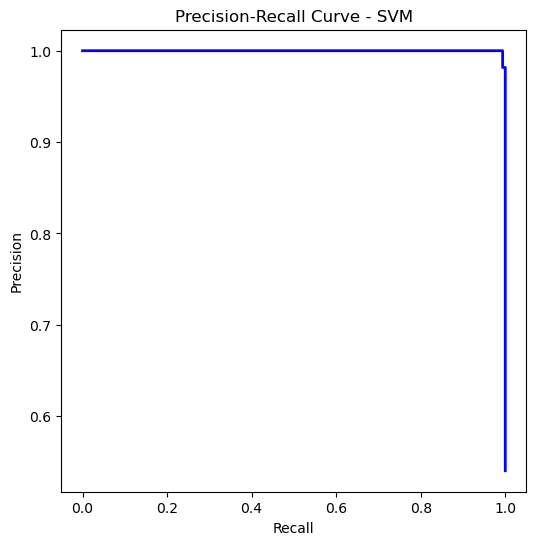

Training Gradient Boosting...


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting Validation Accuracy: 1.0000
Gradient Boosting Test Accuracy: 1.0000
Gradient Boosting Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       161

    accuracy                           1.00       298
   macro avg       1.00      1.00      1.00       298
weighted avg       1.00      1.00      1.00       298

Gradient Boosting saved as C:/Users/HP/OneDrive/Desktop/Karatu/Autism_Spectrum_Disorder_Project/Autism_Project\Gradient_Boosting_model.pkl


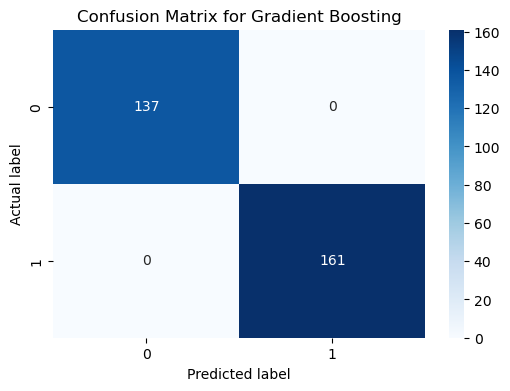

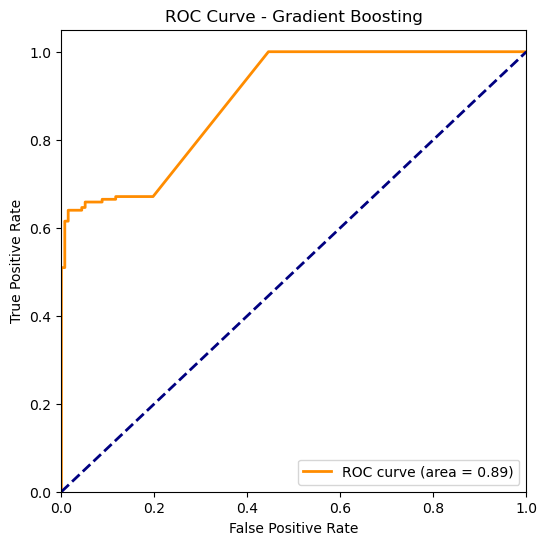

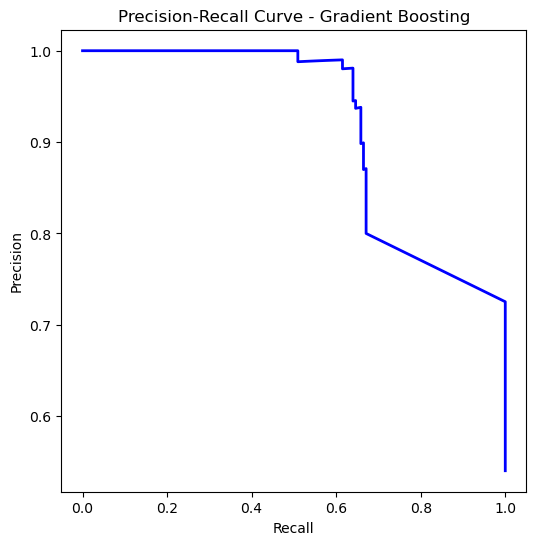

The best performing model is: Random Forest with an accuracy of 1.0000


In [14]:
import os
import joblib
# Create a directory to save the models
model_save_dir = 'C:/Users/HP/OneDrive/Desktop/Karatu/Autism_Spectrum_Disorder_Project/Autism_Project' # Ensure it is your path
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)


# Track the best performing model
best_model_name = None
best_model = None
best_accuracy = 0

# Feature importance containers
rf_feature_importance = None
gb_feature_importance = None
feature_names = X_train.columns  # Assuming the feature names are present

# Training, validating, and testing the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Use scaled data for SVM and Logistic Regression, original for others
    if model_name in ['SVM', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        val_predictions = model.predict(X_val_scaled)
        test_predictions = model.predict(X_test_scaled)
        test_predictions_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        val_predictions = model.predict(X_val)
        test_predictions = model.predict(X_test)
        test_predictions_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Validation results
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"{model_name} Validation Accuracy: {val_accuracy:.4f}")
    
    # Test results
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} Test Classification Report:")
    print(classification_report(y_test, test_predictions))
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = model_name
        best_model = model
        
     # Save the model to disk
    model_filename = os.path.join(model_save_dir, f'{model_name.replace(" ", "_")}_model.pkl')
    joblib.dump(model, model_filename)
    print(f"{model_name} saved as {model_filename}")
    
    # Confusion matrix for the test set
    cm = confusion_matrix(y_test, test_predictions)
    plot_confusion_matrix(cm, model_name)
    
     # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, test_predictions_proba)
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, test_predictions_proba)
    plot_precision_recall_curve(precision, recall, model_name)
    
     # Feature importance for Random Forest and Gradient Boosting
    if model_name == 'Random Forest':
        rf_feature_importance = model.feature_importances_
    elif model_name == 'Gradient Boosting':
        gb_feature_importance = model.feature_importances_
    
    print("="*60)
    
print(f"The best performing model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")

#### Feature Extraction Importance 

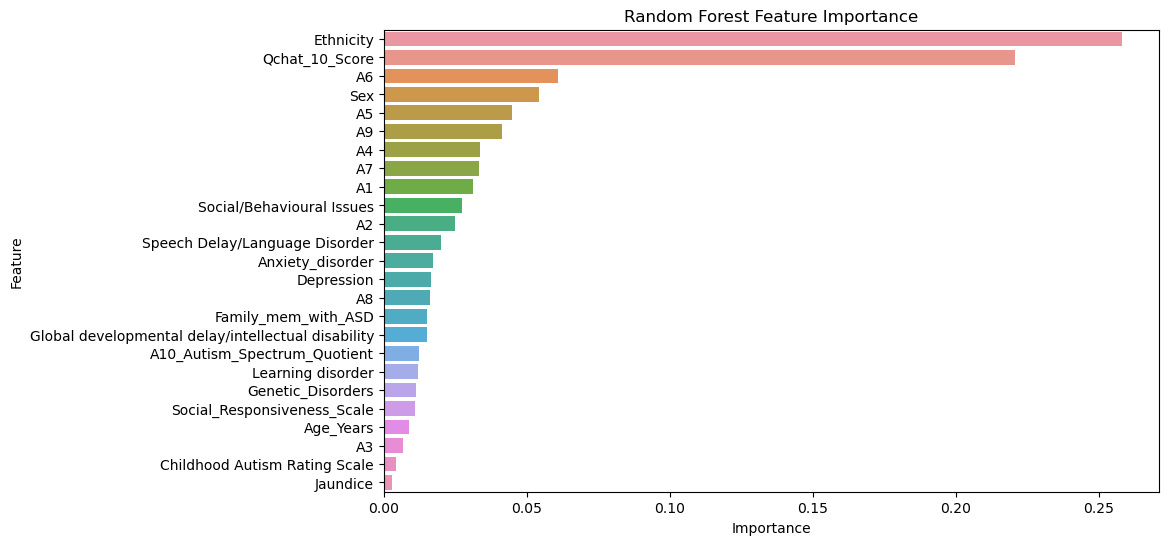

In [16]:
# Feature Importance Visualization
if rf_feature_importance is not None:
    rf_feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': rf_feature_importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
    plt.title('Random Forest Feature Importance')
    plt.show()


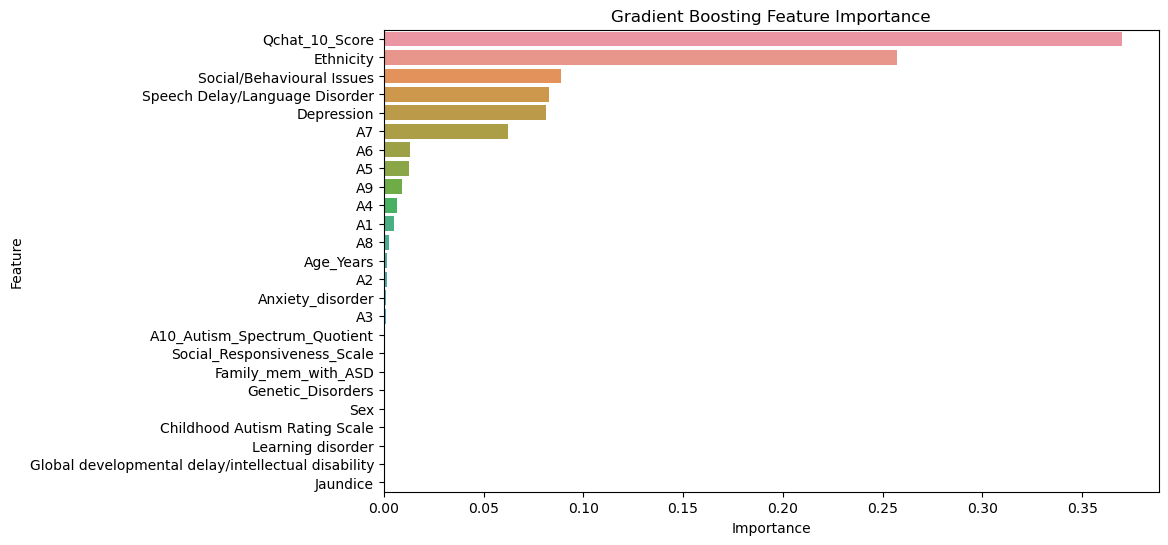

In [17]:
if gb_feature_importance is not None:
    gb_feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': gb_feature_importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df)
    plt.title('Gradient Boosting Feature Importance')
    plt.show()